## Assignment for Week 5 - Neural Network

### Project:
#### Neural Networks
Credit Card Fraud data: https://www.kaggle.com/mlg-ulb/creditcardfraud/

- Make at least 2 EDA plots – histograms, correlation plots (df.corr() in python/pandas, and seaborn’s heatmap can plot it), scatter/line plots, etc.
- Use a neural net to predict if a transaction is fraud or not (you will have to change the loss function from mse/mae to something for binary classification)
- Plot the training and validation loss
- Report the performance on the training and test set with accuracy and confusion matrices
- Write some interpretation of all your results/plots

### Deliverables:

Upload your notebook's .ipynb file. 
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [9]:
import pandas as pd
import numpy as np
import json 

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore', UserWarning)

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ply

# will show plots without doing plt.show()
%matplotlib inline

## Import Data

In [10]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### EDA

#### First Glance of the Data
Null values, data preview, data types

In [17]:
def summary(dataframe):
    null_counts = dataframe.isna().sum()
    preview = print(
        "Example Data:\n"
        f"{json.dumps(dataframe.head(1).to_dict('records'), indent=2)}\n"
        "Data Info:\n"
        f"{dataframe.info()}\n"
        "Missing Values:\n"
        f"{null_counts}"
    )

    return preview
summary(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

The data is all of the same length, so no dimension issues, and there are no null values. The variables are all floats, so there might be two data types: 
- Categorical data (ordinal or ranked numerically) 
- Numerical data

#### Descriptive Stats

In [18]:
round(df.describe(), 1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94813.9,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.3,0.0
std,47488.1,2.0,1.7,1.5,1.4,1.4,1.3,1.2,1.2,1.1,...,0.7,0.7,0.6,0.6,0.5,0.5,0.4,0.3,250.1,0.0
min,0.0,-56.4,-72.7,-48.3,-5.7,-113.7,-26.2,-43.6,-73.2,-13.4,...,-34.8,-10.9,-44.8,-2.8,-10.3,-2.6,-22.6,-15.4,0.0,0.0
25%,54201.5,-0.9,-0.6,-0.9,-0.8,-0.7,-0.8,-0.6,-0.2,-0.6,...,-0.2,-0.5,-0.2,-0.4,-0.3,-0.3,-0.1,-0.1,5.6,0.0
50%,84692.0,0.0,0.1,0.2,-0.0,-0.1,-0.3,0.0,0.0,-0.1,...,-0.0,0.0,-0.0,0.0,0.0,-0.1,0.0,0.0,22.0,0.0
75%,139320.5,1.3,0.8,1.0,0.7,0.6,0.4,0.6,0.3,0.6,...,0.2,0.5,0.1,0.4,0.4,0.2,0.1,0.1,77.2,0.0
max,172792.0,2.5,22.1,9.4,16.9,34.8,73.3,120.6,20.0,15.6,...,27.2,10.5,22.5,4.6,7.5,3.5,31.6,33.8,25691.2,1.0


The statistics show some assumed outliers in Amount, which elude to a higher plausibility to classify as fraud judging by the maximum statistic. The values under max appear to show a positive correlation with classification of variables with fraud, where the higher the number, the higher the chance for fraud. Taking a look at the distributions, we can see if we draw the same assumption: 

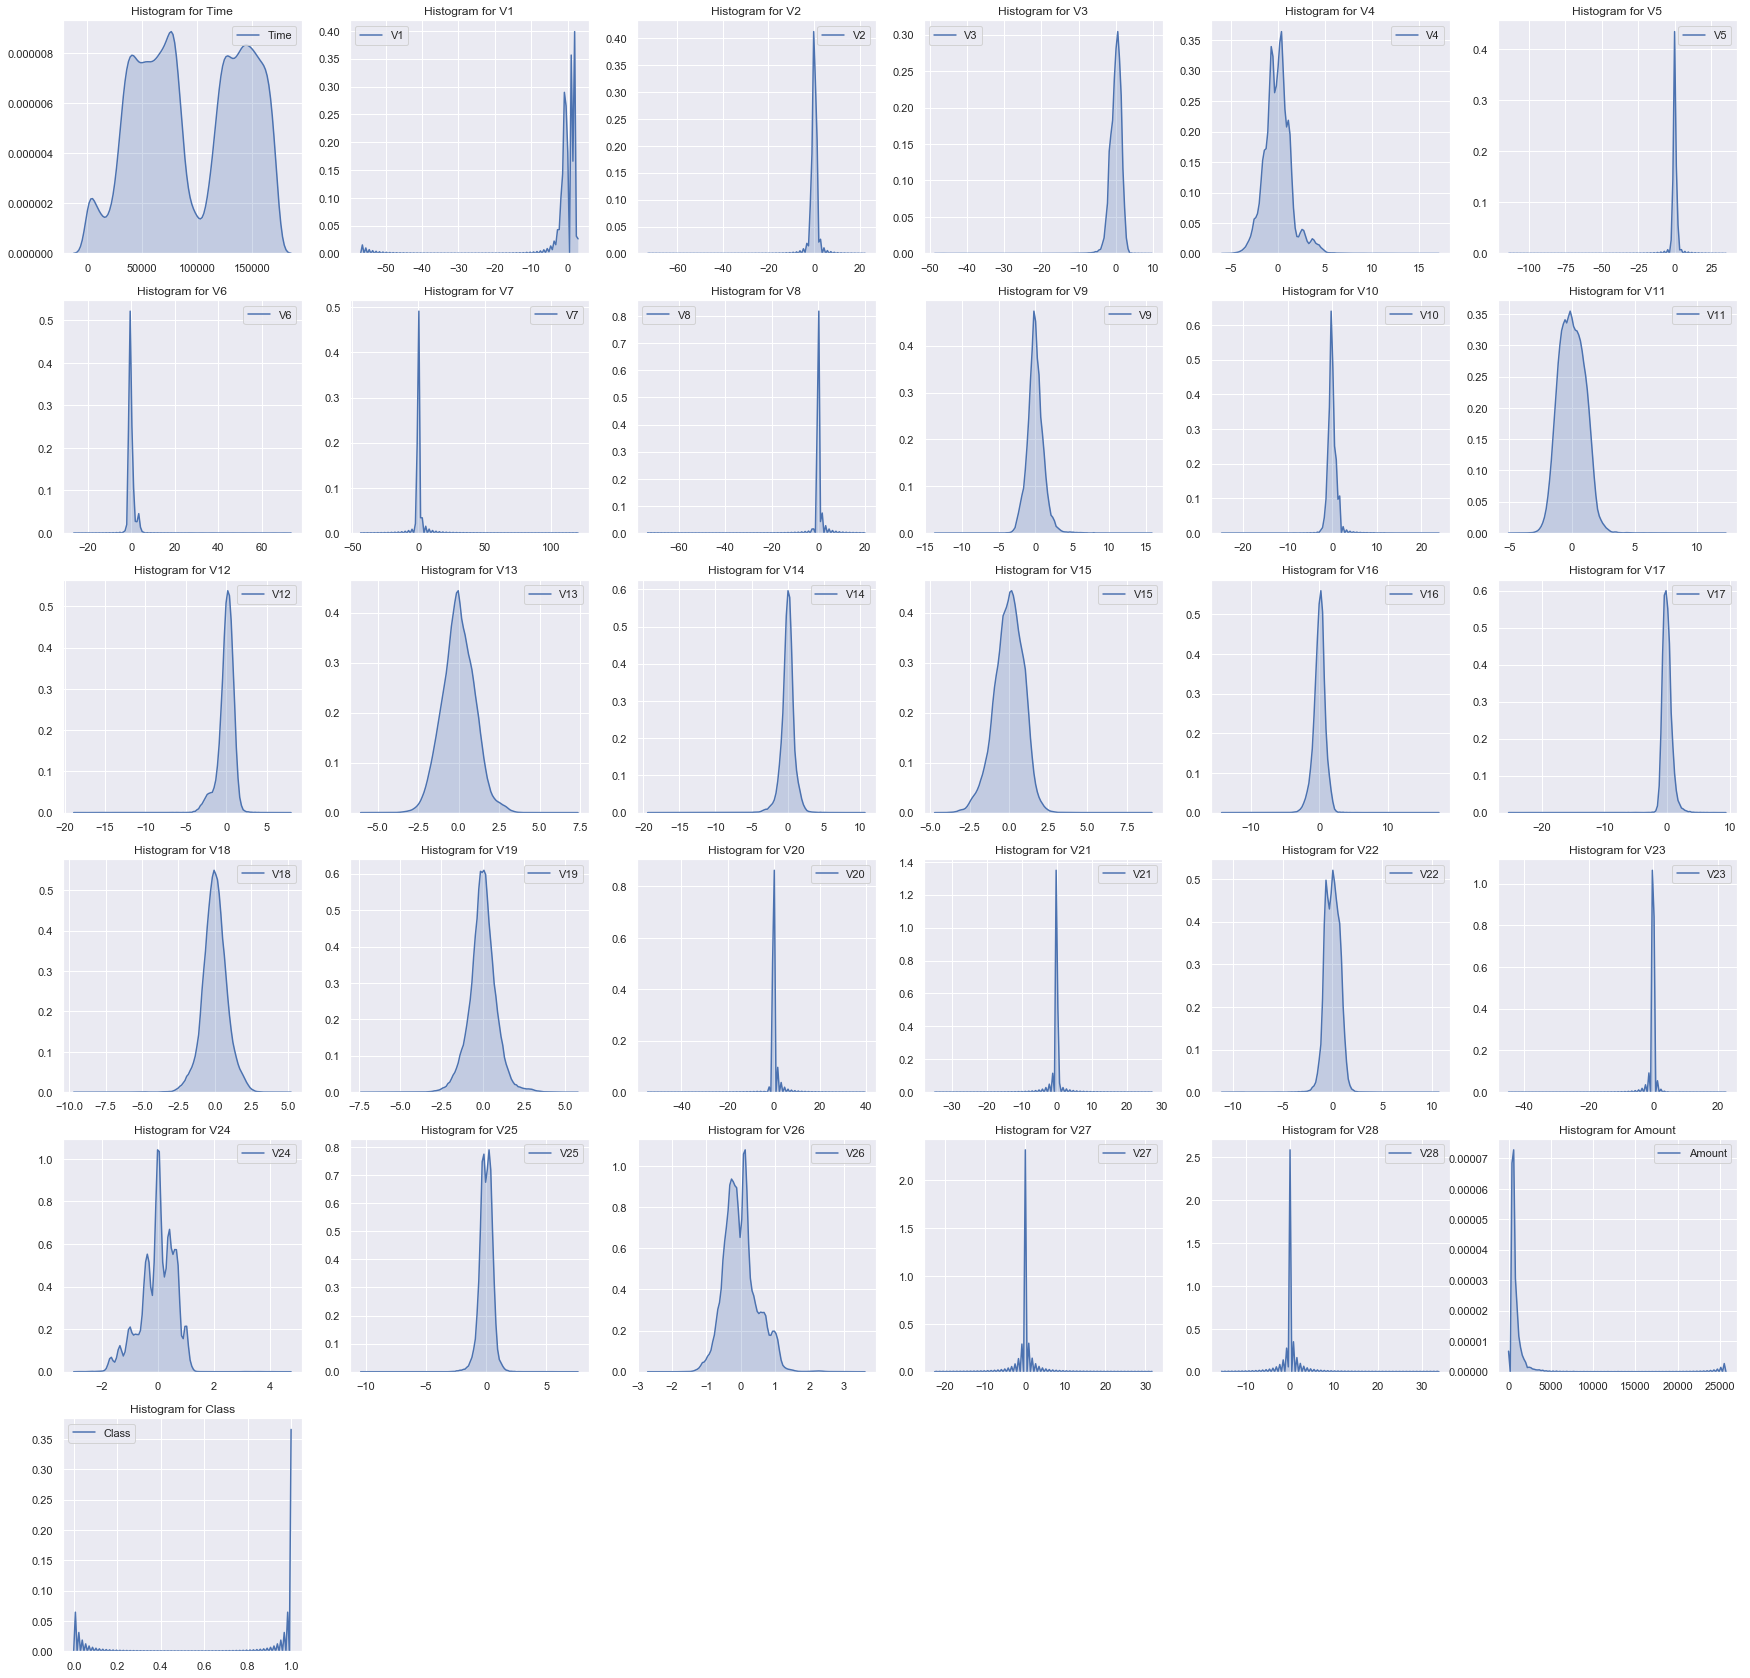

In [43]:
plt.figure(figsize=(30,30))
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
def plots(df): 
    for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 6, i + 1)
    
        # Draw the plot
        sns.kdeplot(df[f'{col}'], shade=True)

        # Title and labels
        ax.set_title('Histogram for %s' % col, size = 12)
    
    return plt.show()
plots(df)

The following variables show a skew distribution: 
V1 & Amount 

The remaining variables are a normal distribution. The class variable has a split distribution among 0 and 1, so it must be the target. 

### Correlations


 				 AVERAGE METRICS BY THE TARGET VARIABLE 



,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


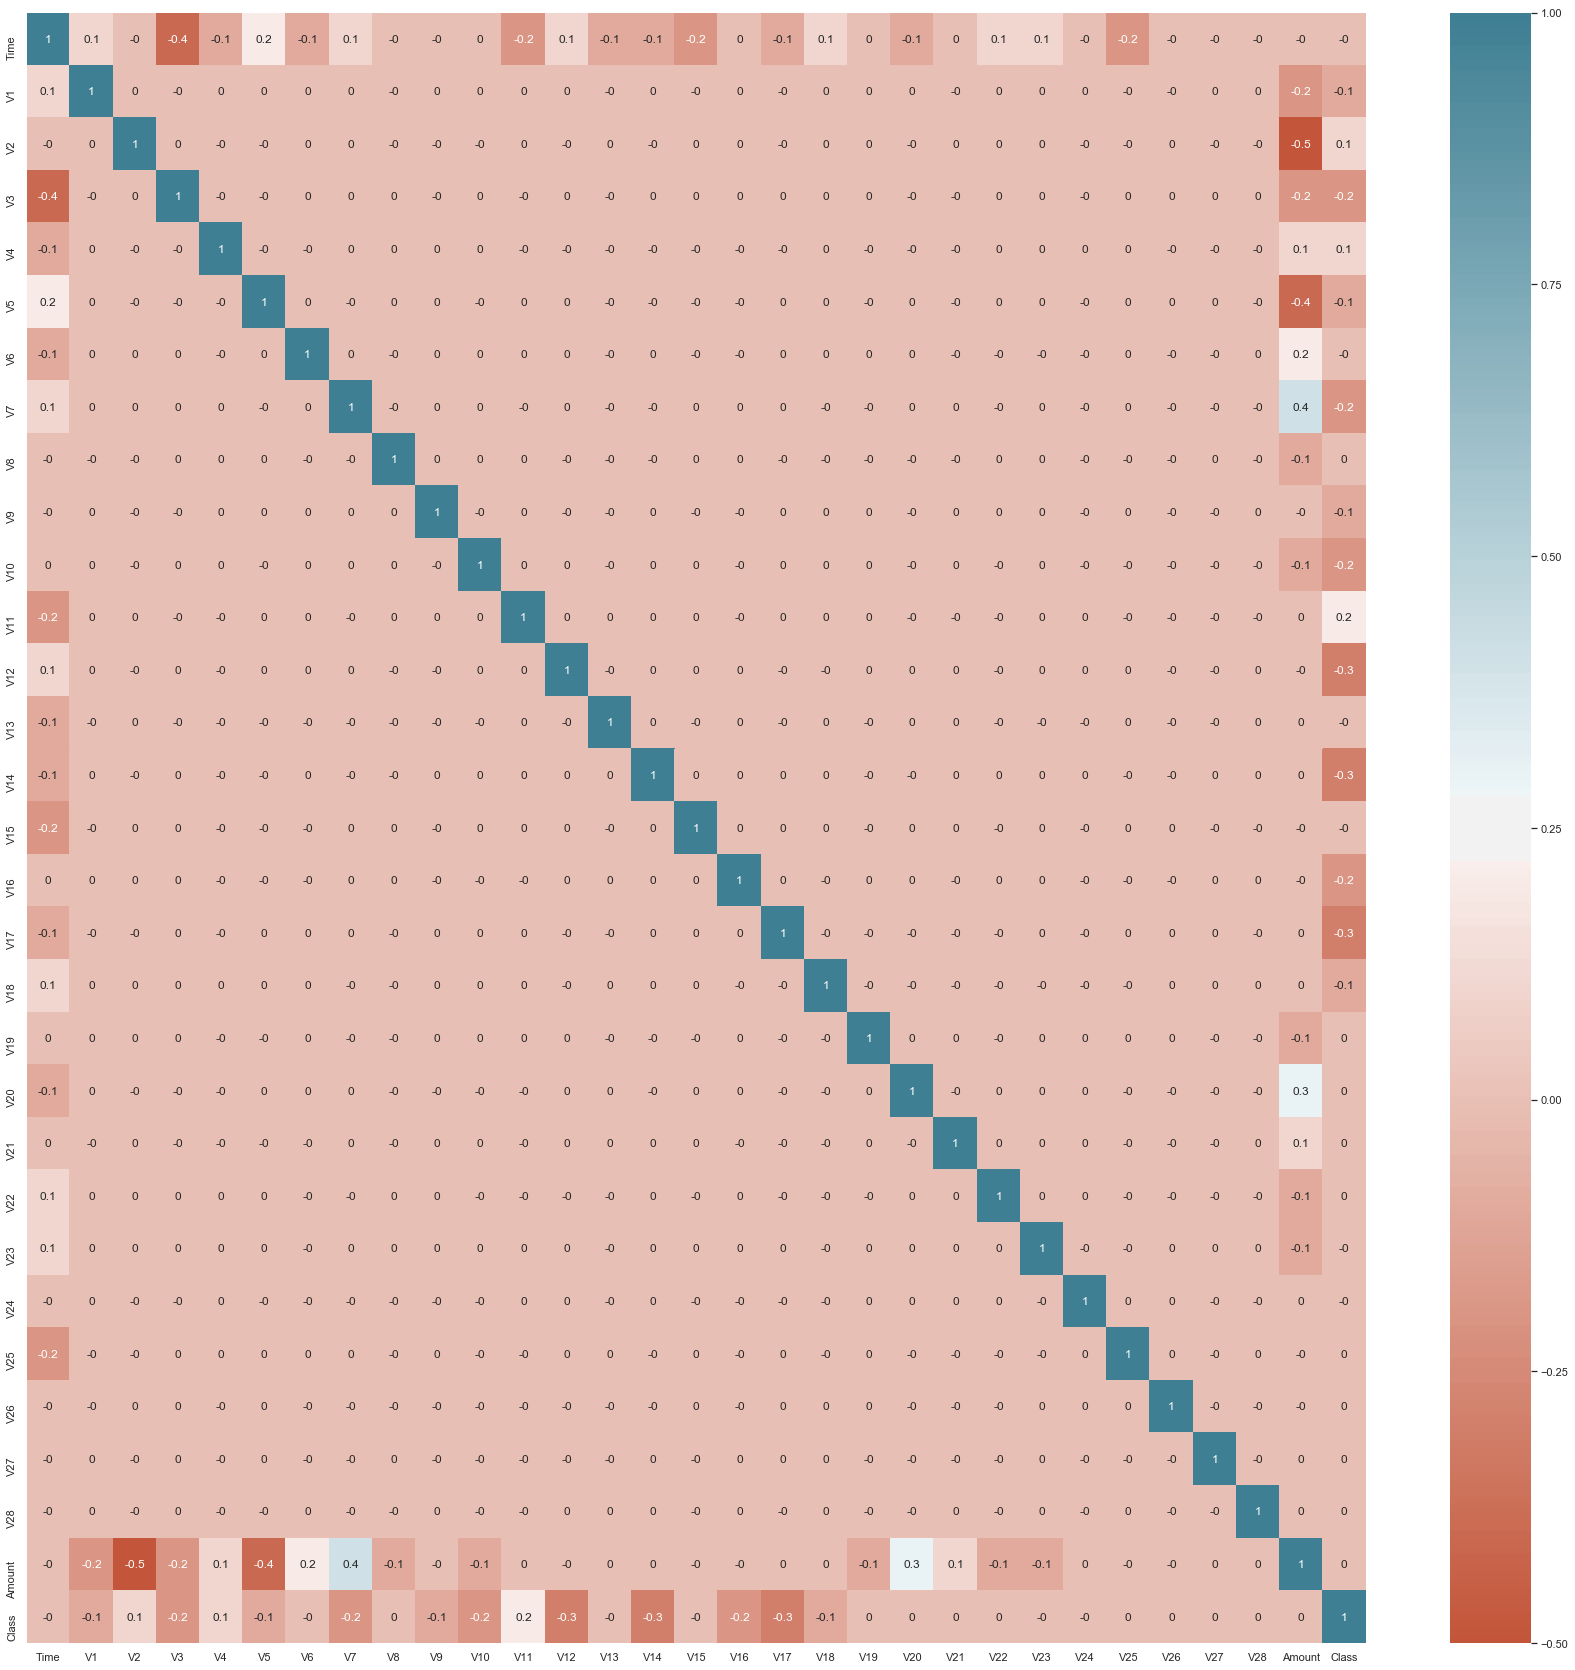

In [48]:
# TARGET VARIABLE SUBSET
print('\n \t\t\t\t AVERAGE METRICS BY THE TARGET VARIABLE \n')
target = df.groupby('Class').mean().reset_index()

# CORRELATION MATRIX 
corrs = df.corr()

fig = plt.figure(figsize=(30,30))
sns.heatmap(round(corrs,1), annot=True, cmap=sns.diverging_palette(20, 220, n=200))

target

V7 and Amount have a positive correlation, as do V20 and Amount. However, interesting enough there are more negative correlations indicating opposite trends of variables. Looking at the `Class` variable and upward, we can compare correlations and see that there are mostly negative correlations, meaning the variables might __not__ be positively correlated. The higher the number doesn't in fact constitute the classification

# Neural Network

In [61]:
# DATA PREPROCESSING

from sklearn import preprocessing  
le = preprocessing.LabelEncoder()

df['Class'] = le.fit_transform(df.Class.values)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [65]:
# Separating the predictors from the target variable.

prediction_col = 'Class'
feature_cols = [c for c in df.columns if c != prediction_col]

x = df[feature_cols]
y = df[prediction_col]

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

# Using a Min-Max scaler. Instead of standard scaler, this will set a consistent minimum and maximum
# value to help narrow the distributions and make for simple classification

from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

In [119]:
from sklearn.neural_network import MLPClassifier  

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, early_stopping=True)  
mlp.fit(x_train, y_train.values.ravel())  

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [120]:
# make predictions
predictions = mlp.predict(x_test)  

# PREDICTIONS 
print("Predictions:\n", f"{pd.Series(predictions).value_counts()}")
print('-'*20)
# ACTUAL 
print("Actual:\n", f"{df.Class.value_counts()}")
print('-'*20)
print(f"Accuracy of MLP: {accuracy_score(y_test, predictions)}")

Predictions:
 0    56867
1       95
dtype: int64
--------------------
Actual:
 0    284315
1       492
Name: Class, dtype: int64
--------------------
Accuracy of MLP: 0.9992802219023208


By first interpretation, the accuracy is too high to match up to the ratio of predictions and actual values. With a confusion matrix, this can be more efficiently summarized:

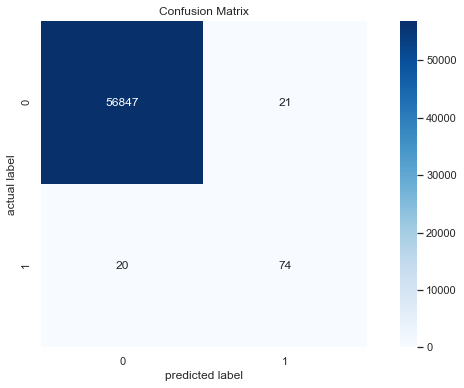

In [121]:
cm = confusion_matrix(y_test, predictions)
target_labels = np.unique(y_test)

plt.figure(figsize=(12, 6))

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="Blues",
            xticklabels=target_labels, yticklabels=target_labels)

plt.title('Confusion Matrix')
plt.xlabel('predicted label')
plt.ylabel('actual label')

plt.show()

The values predicted as 0 or not fraud are quite accurate, and the false negatives are about similar to the false positives. Most importantly, the true negatives are higher than both the incorrect predictions indicating that the model performed reasonably well. The loss function for the algorithm can be plotted to show where it lost efficiency in case we may be dealing with overfitting:

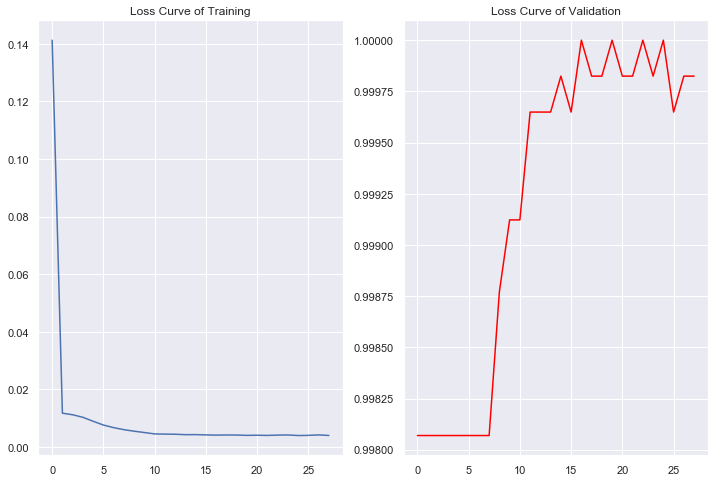

In [131]:
# Training and Validation Performance 

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)

plt.title('Loss Curve of Training')
plt.plot(mlp.loss_curve_)

plt.subplot(1, 2, 2)
plt.title('Loss Curve of Validation')
plt.plot(mlp.validation_scores_, color="Red")



# Conclusion

The loss appears to drop off very early as the validation scores become more consistent, meaning the model is very quick to learn on a larger dataset. Overall, the data is not too complicated for the model especially after encoding. Walking away from this, I'd be curious how to better weight the performance of the model with the math of the sigmoid function and see how this could apply to a variety of use cases.